In [68]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
import openpyxl


### Критерии согласия и однородности

#### Задание1

In [69]:
data = pd.read_excel("sample_1.xlsx")# выборка
data


,5.667284e+08
0,5.667286e+08
1,5.667275e+08
2,5.667276e+08
3,5.667271e+08
4,5.667282e+08
...,...
114,5.667285e+08
115,5.667273e+08
116,5.667282e+08
117,5.667272e+08


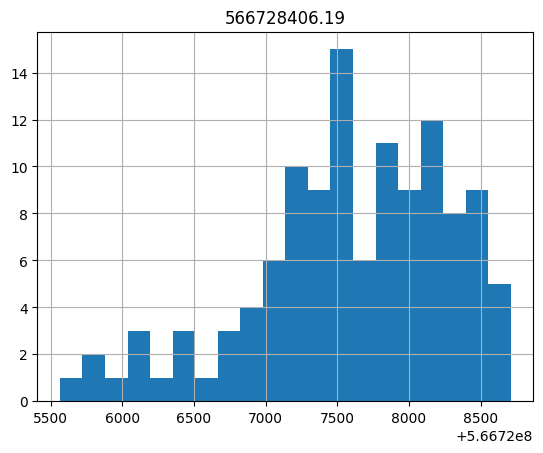

In [70]:
data.hist(bins=20)
plt.show()


441


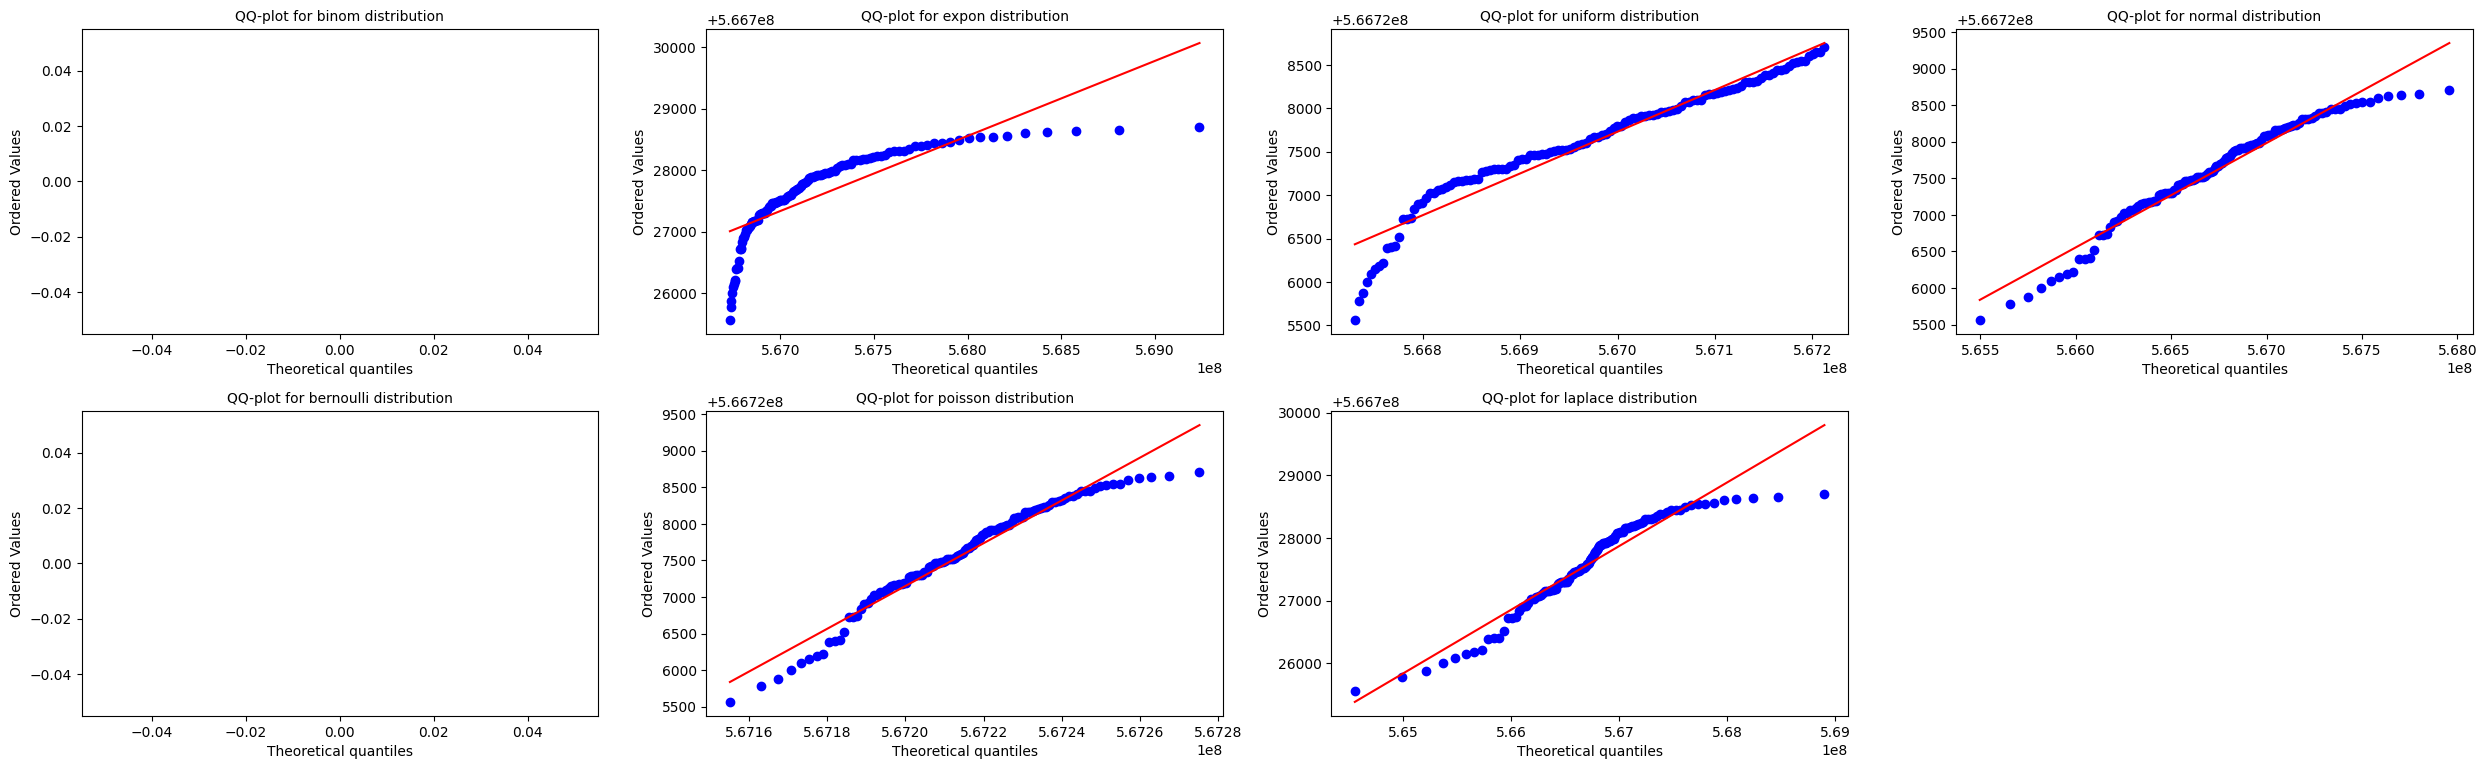

In [71]:
fig = plt.figure(figsize=(25, 15))


distributions = {'binom': ss.binom, 'expon': ss.expon, 'uniform': ss.uniform,
                 'normal': ss.norm, 'bernoulli': ss.bernoulli, 'poisson': ss.poisson, 'laplace': ss.laplace}
ax_first = int(f'{len(distributions) - len(distributions) // 2}' +
               f'{len(distributions) - len(distributions) // 2}' + '1')

print(ax_first)

ax_norm = fig.add_subplot(ax_first)

for counter, distr_type in enumerate(list(distributions.values())):
    res = ss.probplot(data[566728406.19], dist=distr_type, sparams=(
        np.mean(data[566728406.19]), np.var(data[566728406.19])), plot=ax_norm)

    ax_norm.set_title(
        f"QQ-plot for {list(distributions.keys())[counter]} distribution", fontsize=10)

    if counter != len(distributions) - 1:
        ax_norm = fig.add_subplot(ax_first + counter + 1)


fig.tight_layout()
plt.show()


По диаграмме и квантильным графикам можно сказать, что это нормальное распределение.

In [93]:
dataset_listed = data[566728406.19].tolist()
loc,scale = ss.norm.fit(dataset_listed)
ss.kstest(dataset_listed, cdf=ss.norm(loc,scale).cdf) 

KstestResult(statistic=0.07466500635759232, pvalue=0.49728048443486794)

Используя критерий Колмогорова-Смирнова мы видим, что pvalue>(1-altha), значит принимаем гипотезу, что это нормальное распределение.

#### Задание №2

In [79]:
data1 = pd.read_excel("sample_2.xlsx")# выборка
data1


,418683.34
0,418668.38
1,418736.41
2,418711.41
3,419420.42
4,419222.68
...,...
114,419016.87
115,418827.28
116,418814.65
117,418776.21


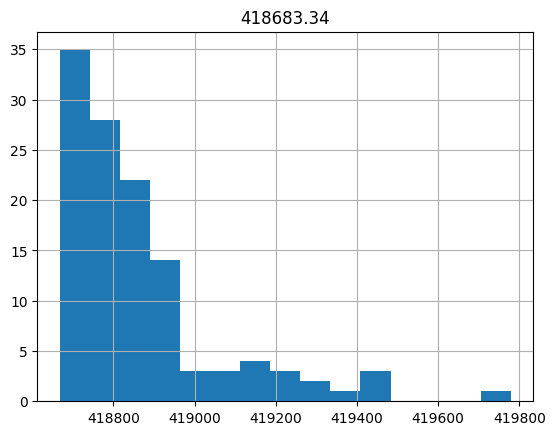

In [80]:
data1.hist(bins=15)
plt.show()


441


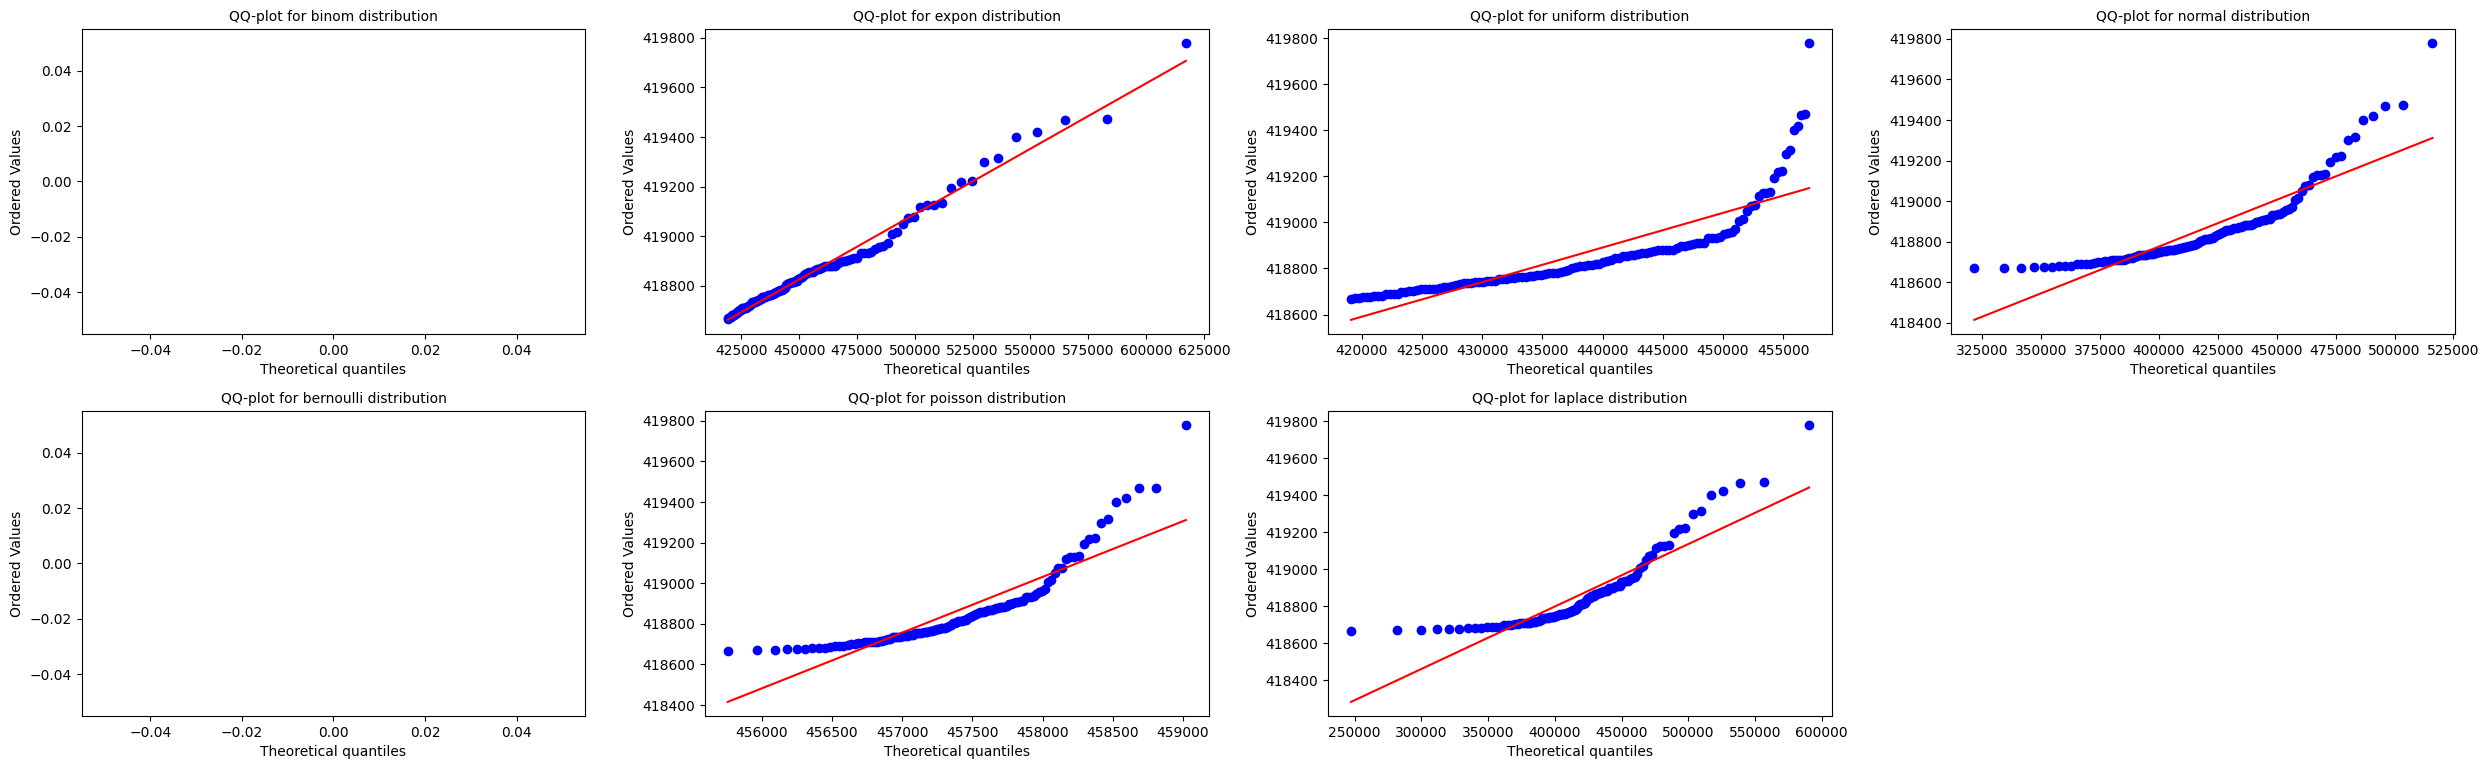

In [81]:
fig = plt.figure(figsize=(25, 15))


distributions = {'binom': ss.binom, 'expon': ss.expon, 'uniform': ss.uniform,
                 'normal': ss.norm, 'bernoulli': ss.bernoulli, 'poisson': ss.poisson, 'laplace': ss.laplace}
ax_first = int(f'{len(distributions) - len(distributions) // 2}' +
               f'{len(distributions) - len(distributions) // 2}' + '1')

print(ax_first)

ax_norm = fig.add_subplot(ax_first)

for counter, distr_type in enumerate(list(distributions.values())):
    res = ss.probplot(data1[418683.34], dist=distr_type, sparams=(
        np.mean(data1[418683.34]), np.var(data1[418683.34])), plot=ax_norm)

    ax_norm.set_title(
        f"QQ-plot for {list(distributions.keys())[counter]} distribution", fontsize=10)

    if counter != len(distributions) - 1:
        ax_norm = fig.add_subplot(ax_first + counter + 1)


fig.tight_layout()
plt.show()


По диаграмме и квантильным графикам видим, что скорее всего это экспоненциальное распределение.

In [84]:
dataset_listed = data1[418683.34].tolist()
loc,scale = ss.expon.fit(dataset_listed)
ss.kstest(dataset_listed, cdf=ss.expon(loc,scale).cdf) 

KstestResult(statistic=0.05963720076988355, pvalue=0.7682809373408863)

Используя критерий Колмогорова-Смирнова мы видим, что pvalue>(1-altha), значит принимаем гипотезу, что это экспоненциальное распределение.

#### Задание №3

In [ ]:
data2 = pd.read_excel("sample_3.xlsx")
data2


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,11.04,17.93,15.39,14.37,17.17,18.47,10.53,18.32,14.00,...,19.80,13.18,12.07,11.95,17.78,16.53,19.33,15.57,13.34,10.82
1,1,13.15,16.05,16.58,10.23,12.59,14.30,17.23,9.44,16.47,...,11.36,18.27,16.28,16.22,19.29,17.17,13.09,14.01,10.62,16.07


В файле sample_3.csv записан некоторый параметр, характеризующий состояние пациентов до начала терапии и после ее окончания. Была ли терапия в эффективна?

In [ ]:
data3 = data2.T
data3

,0,1
Unnamed: 0,0.00,1.00
0,11.04,13.15
1,17.93,16.05
2,15.39,16.58
3,14.37,10.23
...,...,...
115,16.53,17.17
116,19.33,13.09
117,15.57,14.01
118,13.34,10.62


In [ ]:
df = data3.iloc[1:, :]
df


,0,1
0,11.04,13.15
1,17.93,16.05
2,15.39,16.58
3,14.37,10.23
4,17.17,12.59
...,...,...
115,16.53,17.17
116,19.33,13.09
117,15.57,14.01
118,13.34,10.62


In [ ]:
x1 = np.array(df[0])
y1 = np.array(df[1])


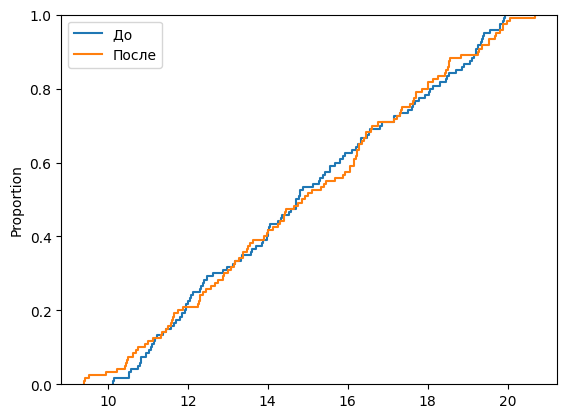

In [ ]:
fig, ax = plt.subplots()
sns.ecdfplot(x=x1, ax=ax, label='До ')
sns.ecdfplot(x=y1, ax=ax, label='После')
ax.legend()


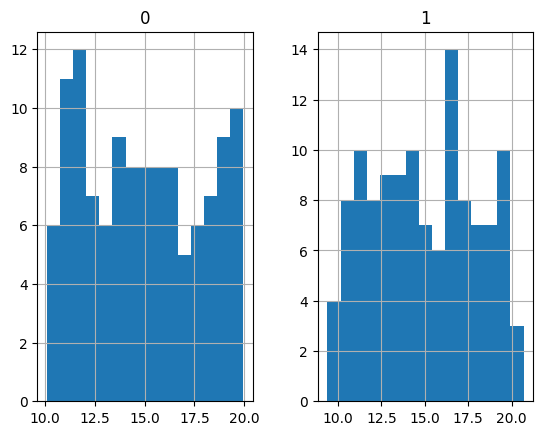

In [ ]:
df.hist(bins=15)
plt.show()


Стьюдентный критерий для парных выборок

In [ ]:
# критерий используется, чтобы определить, равны ли две средние значения генеральной совокупности,
# в которых каждое наблюдение в одной выборке может быть сопоставлено с наблюдением в другой выборке.
from scipy. stats import ttest_rel
ttest_rel(x1, y1)


Ttest_relResult(statistic=0.026634915884547097, pvalue=0.9787955388766918)

Данные представляют собой некоторый параметр, характеризующий состояние пациентов до начала терапии и после ее окончания. Поскольку p-значение больше 0,05, мы принимаем нулевую гипотезу и делаем вывод, что имеется достаточно доказательств того, что эти две выборки приводят к одинаковому среднему значению, следовательно терапия не эффективна.

Задание №4


In [114]:
data4 = pd.read_csv("sample_4 - sample_4.csv.csv")
data5 = data4.T
df1 = data5.iloc[1:, :] 
df1


,0,1
0,142.56,64.33
1,233.41,81.58
2,77.78,151.25
3,118.88,206.90
4,120.65,119.88
...,...,...
115,83.47,167.29
116,119.13,87.50
117,132.91,88.46
118,249.56,69.47


В файле sample_4.csv записаны цены на товары определённой категории в 20XX году и в 20XX+1 году (объекты выбирались случайно). Изменились ли в среднем цены в этой категории за год?

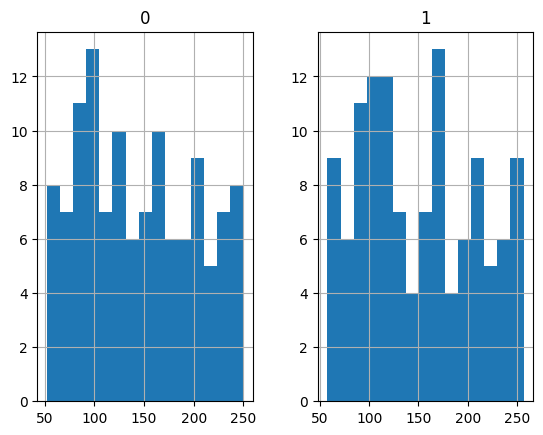

In [115]:
df1.hist(bins=15)
plt.show()


<AxesSubplot: ylabel='Proportion'>

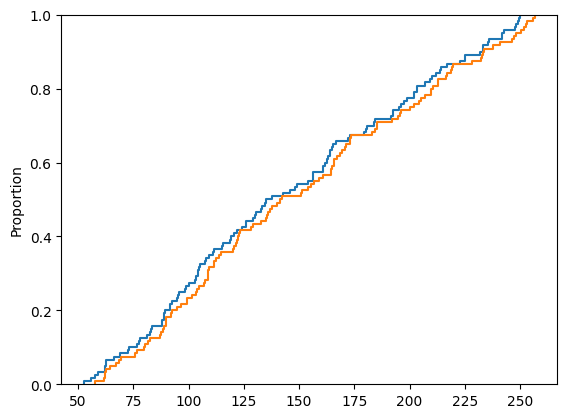

In [117]:
x2 = np.array(df1[0])
y2 = np.array(df1[1])
fig, ax = plt.subplots()
sns.ecdfplot(x=x2, ax=ax, label='До ')
sns.ecdfplot(x=y2, ax=ax, label='После')



Независимый двухвыборочный t-критерий 

In [123]:
# критерий используется, чтобы определить, равны ли два средних значения совокупности.
from scipy. stats import ttest_ind
ttest_ind(x2, y2,equal_var=True)


Ttest_indResult(statistic=-0.6474847879216117, pvalue=0.5179422924199728)

Наши данные представляют собой цены на товары определённой категории в 20XX году и в 20XX+1 году (объекты выбирались случайно). Поскольку p-значение больше    0,05, мы принимаем нулевую гипотезу t-критерия и делаем вывод, что имеется достаточно доказательств того, что две выборки приводят к одинаковому среднему значению, следвательно цены в среднем за год особо не изменились.